In [12]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'svg' # display plots in SVG 

20000 1
30000 2
40000 3
50000 4
60000 5
70000 6
80000 7
90000 8
100000 9


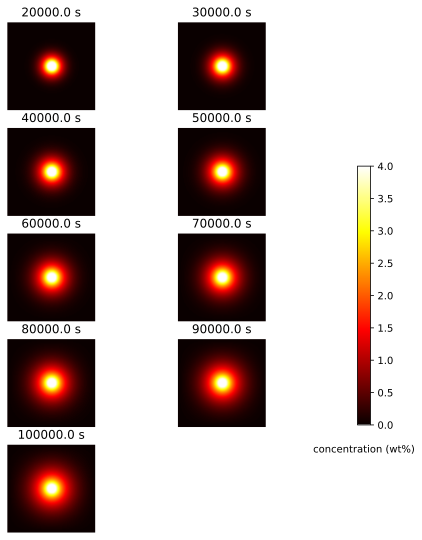

In [13]:
# intervals in x-, y- directions and time
dt = 25 #grid size for time (s)
dx = 0.0001 # grid size for space (m)
dy = 0.0001 # grid size for space (m)
diffusion_co = 10**(-10) # in (m2/s)

# plat size 
x_max = 0.02 # in m
y_max = 0.02 # in m

t_max = 10**5 # total time in (s)
C0 = 4 # concentration at the interior of the circle in (wt%)
C_base = 0 #concentration at the outer part of the circle in (wt%)

# number of intervals

nx = int(x_max/dx)
ny = int(y_max/dy)


dx2 = dx*dx
dy2 = dy*dy


# Initial conditions - circle of radius r centred at (cx,cy) (m)
r = 0.001
cx = 0.01
cy = 0.01

u0 = C_base * np.ones((nx, ny))
u = u0.copy()

r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = C0
            

# function to calculate concentration profiles based on a finite difference approximation to the 2D diffusion 
# equation and the FTCS (forward-difference in time, central-difference in space) scheme:            
def do_timestep(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + diffusion_co * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u



# plotting:
data = []
data.append(u0)
timestep = list(np.arange(2*t_max/10,t_max+t_max/10,t_max/10))
fignum = 0
fig = plt.figure()
for m in np.arange(dt,t_max+dt,dt):
    u0, u = do_timestep(u0, u)
    data.append(u0)
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
                u0[i,j] = C0
    if m in timestep:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(520 + fignum)
        im = ax.imshow(u, cmap=plt.get_cmap('hot'), vmin=np.amin(np.array(data)),vmax=np.amax(np.array(data)))
        ax.set_axis_off()
        ax.set_title('{:.1f} s'.format(m))
fig.subplots_adjust(right=0.85,top= 1.9)
cbar_ax = fig.add_axes([1, 0.5, 0.03, 0.9])
cbar_ax.set_xlabel('concentration (wt%)', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()


In [ ]:
# save  all the concentration profiles data at all time steps into excel file
data = np.array(data)
d1 = []
for i in range(data.shape[0]):
    from_center= data[i][int(data.shape[1]/2)][int(data.shape[2]/2):]
    d1.append(from_center)
    
d1 = np.array(d1)
x = np.arange(dx,x_max+dx,dx)
x = x[int(x.shape[0]/2):]
df = pd.DataFrame(d1,columns = x)
t = np.arange(0,t_max+dt,dt)
df.insert(0,'time/x',t, True)
df=df.set_index(['time/x'])
df.to_excel('data.xlsx')

In [15]:
# show all the concentration profiles data at all time steps into excel file
df

,0.0101,0.0102,0.0103,0.0104,0.0105,0.0106,0.0107,0.0108,0.0109,0.0110,...,0.0191,0.0192,0.0193,0.0194,0.0195,0.0196,0.0197,0.0198,0.0199,0.0200
time/x,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
100,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99900,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.068798,0.060775,0.052876,0.045106,0.037430,0.029845,0.022323,0.014855,0.007418,0.0
99925,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.068832,0.060793,0.052902,0.045120,0.037449,0.029855,0.022334,0.014860,0.007422,0.0
99950,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.068853,0.060823,0.052919,0.045143,0.037460,0.029870,0.022341,0.014867,0.007424,0.0
